<a href="https://colab.research.google.com/github/Sam-Wadmare/ML-LAB/blob/main/lab/clean01new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original shape: (891, 15)
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

After handling missing values:
survived    0
pclass      0
sex         0
age         0
sibsp       0
dtype: int64

Removed using z-score: 27
Removed using IQR: 116


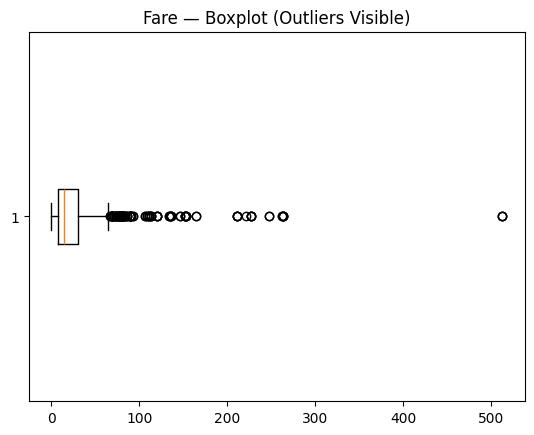

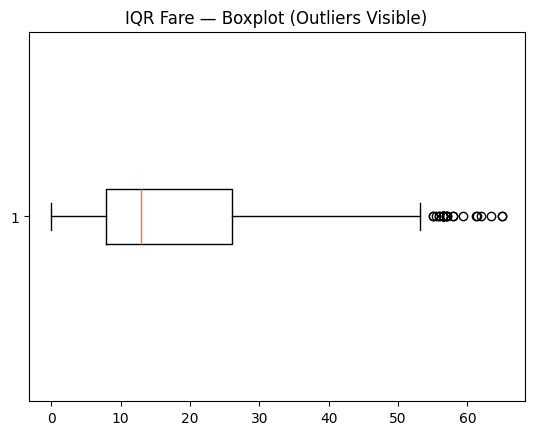

In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Load dataset
df = sns.load_dataset("titanic")

print("Original shape:", df.shape)
print(df.isnull().sum())

# ===============================
# PART A — Handle Missing Values
# ===============================

# Example: Fill age (numeric) with median
df['age'] = df['age'].fillna(df['age'].median())

# Example: Fill embarked (categorical) with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

# Drop rows if too many columns are missing
df = df.dropna(subset=['fare'])   # drop rows where fare is missing

print("\nAfter handling missing values:")
print(df.isnull().sum().head())

# ===============================
# PART B — Outlier Detection
# ===============================

# ---- Method 1: Z-score ----
z = np.abs(stats.zscore(df[['age', 'fare']]))
df_z = df[(z < 3).all(axis=1)]

print("\nRemoved using z-score:", df.shape[0] - df_z.shape[0])

# ---- Method 2: IQR ----
Q1 = df['fare'].quantile(0.25)
Q3 = df['fare'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df_iqr = df[(df['fare'] >= lower) & (df['fare'] <= upper)]

print("Removed using IQR:", df.shape[0] - df_iqr.shape[0])

# ===============================
# Simple Visual (Outlier Boxplot)
# ===============================

plt.boxplot(df['fare'], vert=False)
plt.title("Fare — Boxplot (Outliers Visible)")
plt.show()

plt.boxplot(df_iqr['fare'], vert=False)
plt.title("IQR Fare — Boxplot (Outliers Visible)")
plt.show()
